# STK 353 2023

# Assignment 2: Sampling
Answer the following questions using Python. Please set the following seed for each question.
- numpy.random.seed(12345): The seed of the simulation.
  
Also, take the following iterations for each question needed:

- $M = 10000$: The number of Monte Carlo replications
- $B = 1000$: The number of Bootstrap replications


In [4]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pareto
from scipy.stats import beta
from scipy.stats import norm
from bootstrap_stat import datasets as data


In [5]:
#import numpy as np
#M = 10000
#B = 1000

# Our Sample Space
#S = ['W', 'W', 'W', 'W', 'W', 'W', 'B', 'B', 'B', 'B']

# Print the contents of the list
#print(S)


## Question 1
If 2 balls are randomly drawn **with replacement** from a bowl containing 6 white and 4 black balls, then approximate the probability of the following events by using the Monte Carlo simulations and compare the results with the exact solutions.

- a) What is the probability that both of the balls are black?
- b) What is the probability that one of the balls is white and the other one black?

In [7]:

M = 10000

# Our Sample Space
S = ['W', 'W', 'W', 'W', 'W', 'W', 'B', 'B', 'B', 'B']

# Initialize counters
count_BB = 0
count_BW = 0

# Perform Monte Carlo simulation
for _ in range(M):
    ball_1 = np.random.choice(S, replace=True)
    ball_2 = np.random.choice(S, replace=True)

    if ball_1 == 'B' and ball_2 == 'B':
        count_BB += 1

    if (ball_1 == 'B' and ball_2 == 'W') or (ball_1 == 'W' and ball_2 == 'B'):
        count_BW += 1

# Calculate probabilities
est_p_BB = count_BB / M
est_p_BW = count_BW / M

# Compare with exact probabilities
exact_p_BB = (4 / 10) * (4 / 10)
exact_p_BW = 2 * (4 / 10) * (6 / 10)

# Print the results
print(f"a) Estimated p(BB) = {est_p_BB:.4f}, Exact p(BB) = {exact_p_BB:.4f}")
print(f"b) Estimated p(BW) = {est_p_BW:.4f}, Exact p(BW) = {exact_p_BW:.4f}")


a) Estimated p(BB) = 0.1569, Exact p(BB) = 0.1600
b) Estimated p(BW) = 0.4818, Exact p(BW) = 0.4800


## Question 2

The $Pareto(a, b)$ distribution has cdf

$$F (x) = 1 - \left(\dfrac{\sigma}{x}\right)^\alpha, \qquad x > \sigma,$$

where $\sigma >0$ and $\alpha > 0$. 

- a) Use the PIT method to simulate a random sample of size $M$ from the $Pareto(2, 3)$ distribution. Graph the histogram of the sample with the $Pareto(2, 3)$ density superimposed for comparison.
- b) If the lifetime of a component (in hours) follows from $Pareto(2, 3)$ distribution, then what is the approximated probability that it fails before 5 hours? Compare your answer with the exact one.

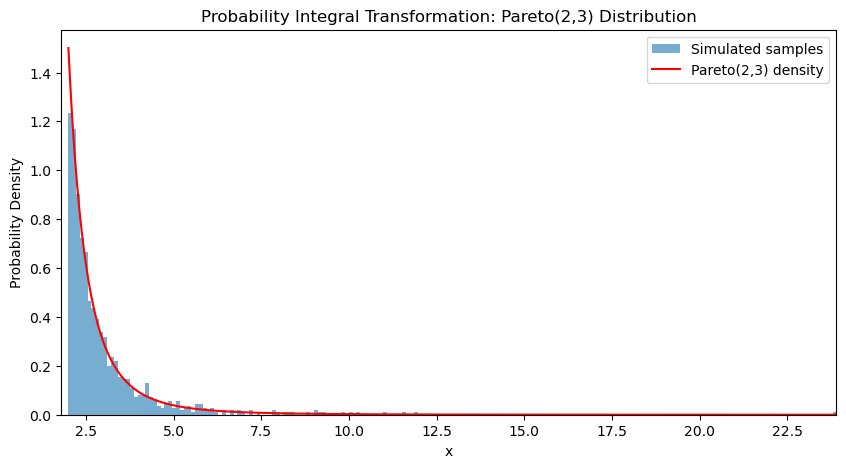

Approximated probability of failure before 5 hours: 0.9350
Exact probability of failure before 5 hours: 0.9360


In [18]:
#Question 2a
# Set parameters for the Pareto distribution
sigma = 2
alpha = 3

# Part a: Simulate a random sample using PIT
M = 1000  # Sample size
np.random.seed(12345)
u = np.random.uniform(0, 1, M)
x = sigma / (1 - u) ** (1 / alpha)

# Plot the simulated sample and Pareto density
plt.figure(figsize=(10, 5))
plt.hist(x, density=True, bins=200, label="Simulated samples", alpha=0.6)
x_s = np.linspace(sigma, max(x), M)
plt.plot(x_s, pareto.pdf(x_s, alpha, scale=sigma), c="r", label="Pareto(2,3) density")

plt.title("Probability Integral Transformation: Pareto(2,3) Distribution")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.xlim(1.8, max(x))

plt.show()

# Question 2b: Calculate the approximate and exact probabilities of failure before 5 hours
approx_p_less5 = np.mean(x < 5)

def ParetoCDF(x, sigma=2, alpha=3):
    if x > sigma:
        return 1 - (sigma / x) ** alpha
    else:
        print(f"Error: Value for x must be greater than {sigma}")

exact_p_less5 = ParetoCDF(5)

print(f"Approximated probability of failure before 5 hours: {approx_p_less5:.4f}")
print(f"Exact probability of failure before 5 hours: {exact_p_less5:.4f}")


## Question 3
Write a function to generate a random sample of size $n$ from the $Beta(a, b)$ distribution by the acceptance-rejection method. Generate a random sample of size $M$ from the $Beta(3,2)$ distribution. Graph the histogram of the sample with the theoretical $Beta(3,2)$ density curve.

_Hint: Use the standard uniform distribution U(0, 1) as the proposal._

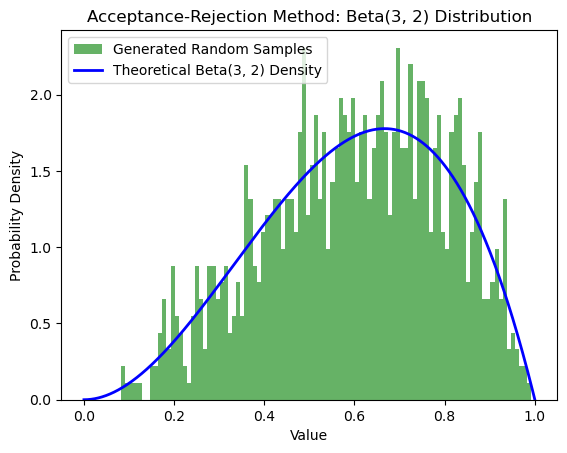

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

def acceptance_rejection_beta(a, b, n):
    samples = []
    M = beta.pdf((a - 1) / (a + b - 2), a, b)  # Mode of the Beta distribution
    
    while len(samples) < n:
        u1, u2 = np.random.uniform(0, 1, 2)
        x = u1
        y = M * u2
        
        # Calculate the acceptance probability
        pdf_x = beta.pdf(x, a, b)
        acceptance_prob = pdf_x / M
        
        if y <= acceptance_prob:
            samples.append(x)
    
    return samples

def plot_beta_distribution(a, b, n):
    samples = acceptance_rejection_beta(a, b, n)

    plt.hist(samples, bins=100, density=True, alpha=0.6, color="g", label="Generated Random Samples")

    x = np.linspace(0, 1, 1000)
    pdf = beta.pdf(x, a, b)
    plt.plot(x, pdf, 'b-', lw=2, label=f"Theoretical Beta({a}, {b}) Density")

    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.title(f'Acceptance-Rejection Method: Beta({a}, {b}) Distribution')
    plt.legend()
    plt.show()

# Example: Generate a sample from Beta(3, 2) and plot the histogram
plot_beta_distribution(3, 2, 1000)



## Question 4

A telecommunications company wants to estimate the churn rate of its customers. Implement the Bootstrap method to estimate the 90% confidence interval for the churn rate. The following observations are the only available information from the churn rate

churn_data = (1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1).

In [23]:
# Churn data
churn_data = [1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1]

# Resampling statistic - mean
theta_hat = np.mean(churn_data)

# Number of resamples and sample size
B = 10000  # Increase the number of resamples
n = len(churn_data)

# Initialize an array to store resampled statistics
theta_star = np.zeros(B)

# Bootstrap simulation
for i in range(B):
    x_star = np.random.choice(churn_data, size=n, replace=True)
    theta_star[i] = np.mean(x_star)

# Confidence interval calculation
alpha = 0.10
ci = np.quantile(theta_star, (alpha / 2, 1 - alpha / 2))

# Output results
print(f"Lower CI = {ci[0]:.4f}")
print(f"Upper CI = {ci[1]:.4f}")



Lower CI = 0.2500
Upper CI = 0.6500


## Question 5

You are analyzing daily temperature data for a city. Implement the Bootstrap method to estimate the 95% confidence interval for the average daily temperature if we have observed the following records for the last 10 days (in °C)

Temp = (25.2, 27.5, 23.8, 22.1, 26.7, 24.5, 28.3, 25.9, 23.6, 27.8)

In [24]:
# Temperature data
temp = [25.2, 27.5, 23.8, 22.1, 26.7, 24.5, 28.3, 25.9, 23.6, 27.8]

# Resampling statistic - mean
theta_hat = np.mean(temp)

# Number of resamples and sample size
B = 10000  # Increase the number of resamples
n = len(temp)

# Initialize an array to store resampled statistics
theta_star = np.zeros(B)

# Bootstrap simulation
for i in range(B):
    x_star = np.random.choice(temp, size=n, replace=True)
    theta_star[i] = np.mean(x_star)

# Confidence interval calculation
alpha = 0.05
ci = np.quantile(theta_star, (alpha / 2, 1 - alpha / 2))

# Output results
print(f"Lower CI = {ci[0]:.4f}")
print(f"Upper CI = {ci[1]:.4f}")


Lower CI = 24.3200
Upper CI = 26.7200


## Question 6

Each year, all American Bar Association (ABA) approved law schools within the United States must make disclosures to the ABA. These required disclosures include bar passage rates by state and the aggregate undergraduate GPA and LSAT scores of incoming students. The LSAT is the test law school applicants take prior to law school. It's the most important criterion in law school admissions, and a low score is law school death.

Consider the following small data set of the LSAT variable:

If the parameter of interest is the standard deviation of the LSAT scores of the incoming students ($\sigma$), then by using the sample standard deviation ($\hat\sigma$) as the estimator of $\sigma$, answer the following questions using the Bootstrap resampling method:

- a) Obtain the value of $\hat\sigma$ for the original sample.
- b) Obtain some properties of $\hat\sigma$ including the Bias, SD and the MSE. How do you interpret the Bias obtained?
- c) Obtain the Bootstrap distribution of $\hat\sigma$.

Sample Standard Deviation (^σ) = 40.3773

 Bias(^σ) = -1.6845 
 SD(^σ) = 4.7529 
 MSE(^σ) = 25.4280


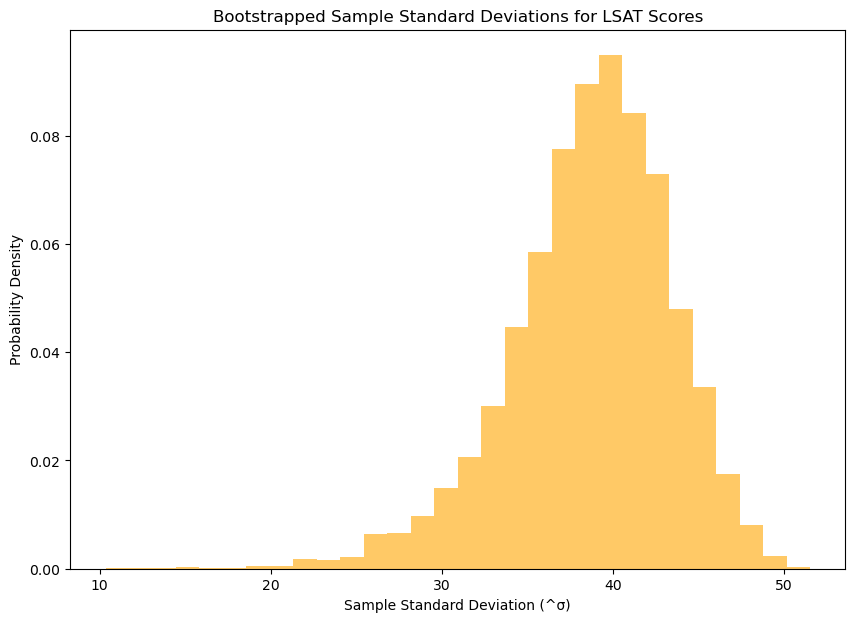

In [25]:
# Sample LSAT scores data
law = data.law_data()
lsat = law["LSAT"]

# a) Obtain the value of 𝜎̂  for the original sample.
sample_std = np.std(lsat)
print(f"Sample Standard Deviation (^σ) = {sample_std:.4f}")

# b) Obtain some properties of 𝜎̂  including the Bias, SD, and the MSE. Interpret the Bias obtained.
B = 10000  # Number of bootstrap samples
n = len(lsat)  # Sample size

# Bootstrap function to obtain 𝜎̂_star
def bootstrap_std(B, x, n):
    std_star = np.zeros(B)
    np.random.seed(12345)
    for i in range(B):
        x_sample = np.random.choice(x, size=n, replace=True)
        std_star[i] = np.std(x_sample)
    return std_star

# Calculate the bootstrap distribution of sample standard deviation 𝜎̂
sample_std_star = bootstrap_std(B, lsat, n)

# Calculate the bias, SD, and MSE of sample standard deviation 𝜎̂
bias_std = np.mean(sample_std_star) - sample_std
sd_std = np.std(sample_std_star)
mse_std = bias_std ** 2 + sd_std ** 2

print("\n", f"Bias(^σ) = {bias_std:.4f}", "\n", f"SD(^σ) = {sd_std:.4f}",
      "\n", f"MSE(^σ) = {mse_std:.4f}")

# Interpretation of bias
# If bias(^σ) = 0, ^σ equals the true value of σ.
# If bias(^σ) > 0, ^σ overestimates the true value of σ.
# If bias(^σ) < 0, ^σ underestimates the true value of σ.

# c) Obtain the Bootstrap distribution of 𝜎̂.

plt.figure(figsize=(10, 7))
plt.hist(sample_std_star, bins=30, density=True, alpha=0.6, color="orange")
plt.xlabel("Sample Standard Deviation (^σ)")
plt.title("Bootstrapped Sample Standard Deviations for LSAT Scores")
plt.ylabel("Probability Density")
plt.show()





## Question 7

Consider the following integral

$$\int_0^2 \dfrac{1}{3\sqrt{2\pi}}e^{\dfrac{-(x - 1)^2}{18}}dx.$$

- a) What probability is this integral calculating? Compute it via a built-in Python function.
- b) Approximate it using the Monte Carlo integration and compare your answer with the one of Part (a).

In [26]:
# a) What probability is this integral calculating? Compute it via a built-in Python function.
a, b = 0, 2
mu, sigma = 1, 3
exact_prob = norm.cdf(b, mu, sigma) - norm.cdf(a, mu, sigma)
print(f"Exact p(0 < x < 2) = {exact_prob:.6f}")

# b) Approximate it using the Monte Carlo integration and compare your answer with the one of Part (a).
np.random.seed(12345)
M = 100000  # Number of samples
x = np.random.uniform(a, b, M)
est_prob = (b - a) * np.mean(1 / (3 * np.sqrt(2 * np.pi)) * np.exp(-1 * (x - 1) ** 2 / 18))
print(f"Estimated p(0 < x < 2) = {est_prob:.6f}")

Exact p(0 < x < 2) = 0.261117
Estimated p(0 < x < 2) = 0.261104
